In [12]:
import json
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import odi_detail_agg as odi
import t20_detail_agg as t20

In [13]:
t20_raw_data = t20.get_t20_details(2015)
odi_raw_data = odi.get_odi_details(2015)


In [26]:
def calc_totals(raw_data):
    totals = np.zeros((12, 2), dtype=np.int32)
    for match in raw_data:
        totals[0][0] += match['first_inn_q1_runs']
        totals[1][0] += match['first_inn_q2_runs']
        totals[2][0] += match['first_inn_q3_runs']
        totals[3][0] += match['first_inn_q4_runs']
    
        totals[4][0] += match['first_inn_q1_wickets']
        totals[5][0] += match['first_inn_q2_wickets']
        totals[6][0] += match['first_inn_q3_wickets']
        totals[7][0] += match['first_inn_q4_wickets']
    
        totals[8][0] += match['first_inn_q1_deliveries']
        totals[9][0] += match['first_inn_q2_deliveries']
        totals[10][0] += match['first_inn_q3_deliveries']
        totals[11][0] += match['first_inn_q4_deliveries']
        
        totals[0][1] += match['second_inn_q1_runs']
        totals[1][1] += match['second_inn_q2_runs']
        totals[2][1] += match['second_inn_q3_runs']
        totals[3][1] += match['second_inn_q4_runs']
    
        totals[4][1] += match['second_inn_q1_wickets']
        totals[5][1] += match['second_inn_q2_wickets']
        totals[6][1] += match['second_inn_q3_wickets']
        totals[7][1] += match['second_inn_q4_wickets']
    
        totals[8][1] += match['second_inn_q1_deliveries']
        totals[9][1] += match['second_inn_q2_deliveries']
        totals[10][1] += match['second_inn_q3_deliveries']
        totals[11][1] += match['second_inn_q4_deliveries']
    return totals

In [27]:
t20_totals = calc_totals(t20_raw_data)
odi_totals = calc_totals(odi_raw_data)
print(f'{t20_totals}\n --------------- \n {odi_totals}')

[[53746 55101]
 [52043 51223]
 [55856 49184]
 [64724 37995]
 [ 2018  2268]
 [ 2004  2053]
 [ 2379  2339]
 [ 4024  2457]
 [47789 47673]
 [46734 45494]
 [46056 41265]
 [44008 28593]]
 --------------- 
 [[22005 19328]
 [22713 17973]
 [25665 15326]
 [29331  9624]
 [  630   620]
 [  705   650]
 [  916   640]
 [ 1616   553]
 [26036 22187]
 [24977 19010]
 [23907 15100]
 [21170  8050]]


In [35]:
t20_bat_avg = np.array([], dtype=[('f_avg_q_1_t20', 'float'), ('f_avg_q_2_t20', 'float'), ('f_avg_q_3_t20', 'float'), ('f_avg_q_4_t20', 'float'), ('s_avg_q_1_t20', 'float'), ('s_avg_q_2_t20', 'float'), ('s_avg_q_3_t20', 'float'), ('s_avg_q_4_t20', 'float')])

odi_bat_avg = np.array([], dtype=[('f_avg_q_1_odi', 'float'), ('f_avg_q_2_odi', 'float'), ('f_avg_q_3_odi', 'float'), ('f_avg_q_4_odi', 'float'), ('s_avg_q_1_odi', 'float'), ('s_avg_q_2_odi', 'float'), ('s_avg_q_3_odi', 'float'), ('s_avg_q_4_odi', 'float')])

t20_bat_sr = np.array([], dtype=[('f_sr_q_1_t20', 'float'), ('f_sr_q_2_t20', 'float'), ('f_sr_q_3_t20', 'float'), ('f_sr_q_4_t20', 'float'), ('s_sr_q_1_t20', 'float'), ('s_sr_q_2_t20', 'float'), ('s_sr_q_3_t20', 'float'), ('s_sr_q_4_t20', 'float')])

odi_bat_sr = np.array([], dtype=[('f_sr_q_1_odi', 'float'), ('f_sr_q_2_odi', 'float'), ('f_sr_q_3_odi', 'float'), ('f_sr_q_4_odi', 'float'), ('s_sr_q_1_odi', 'float'), ('s_sr_q_2_odi', 'float'), ('s_sr_q_3_odi', 'float'), ('s_sr_q_4_odi', 'float')])


In [36]:
t20_bat_avg = np.append(t20_bat_avg, np.array([(t20_totals[0][0]/t20_totals[4][0], t20_totals[1][0]/t20_totals[5][0], t20_totals[2][0]/t20_totals[6][0], t20_totals[3][0]/t20_totals[7][0], t20_totals[0][1]/t20_totals[4][1], t20_totals[1][1]/t20_totals[5][1], t20_totals[2][1]/t20_totals[6][1], t20_totals[3][1]/t20_totals[7][1])], dtype=t20_bat_avg.dtype))
t20_bat_sr = np.append(t20_bat_sr, np.array([(t20_totals[0][0]/t20_totals[8][0], t20_totals[1][0]/t20_totals[9][0], t20_totals[2][0]/t20_totals[10][0], t20_totals[3][0]/t20_totals[11][0], t20_totals[0][1]/t20_totals[8][1], t20_totals[1][1]/t20_totals[9][1], t20_totals[2][1]/t20_totals[10][1], t20_totals[3][1]/t20_totals[11][1])], dtype=t20_bat_sr.dtype))

odi_bat_avg = np.append(odi_bat_avg, np.array([(odi_totals[0][0]/odi_totals[4][0], odi_totals[1][0]/odi_totals[5][0], odi_totals[2][0]/odi_totals[6][0], odi_totals[3][0]/odi_totals[7][0], odi_totals[0][1]/odi_totals[4][1], odi_totals[1][1]/odi_totals[5][1], odi_totals[2][1]/odi_totals[6][1], odi_totals[3][1]/odi_totals[7][1])], dtype=odi_bat_avg.dtype))
odi_bat_sr = np.append(odi_bat_sr, np.array([(odi_totals[0][0]/odi_totals[8][0], odi_totals[1][0]/odi_totals[9][0], odi_totals[2][0]/odi_totals[10][0], odi_totals[3][0]/odi_totals[11][0], odi_totals[0][1]/odi_totals[8][1], odi_totals[1][1]/odi_totals[9][1], odi_totals[2][1]/odi_totals[10][1], odi_totals[3][1]/odi_totals[11][1])], dtype=odi_bat_sr.dtype))

for field in t20_bat_sr.dtype.fields:
    t20_bat_sr[field] *= 100

for field in odi_bat_sr.dtype.fields:
    odi_bat_sr[field] *= 100

/tmp/ipykernel_41890/260510325.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  t20_first_inn_avg = [float(t20_bat_avg['f_avg_q_1_t20']), float(t20_bat_avg['f_avg_q_2_t20']), float(t20_bat_avg['f_avg_q_3_t20']), float(t20_bat_avg['f_avg_q_4_t20'])]
/tmp/ipykernel_41890/260510325.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  odi_first_inn_avg = [float(odi_bat_avg['f_avg_q_1_odi']), float(odi_bat_avg['f_avg_q_2_odi']), float(odi_bat_avg['f_avg_q_3_odi']), float(odi_bat_avg['f_avg_q_4_odi'])]
/tmp/ipykernel_41890/260510325.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in fut

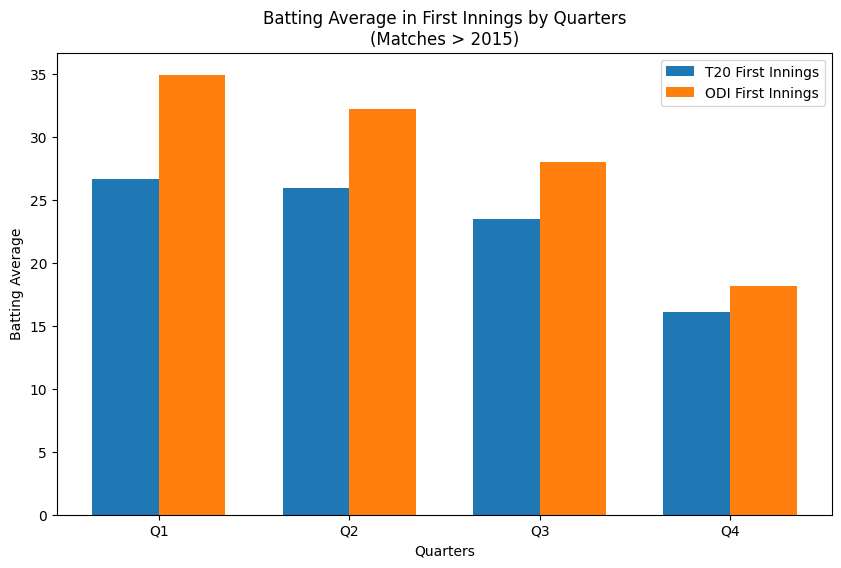

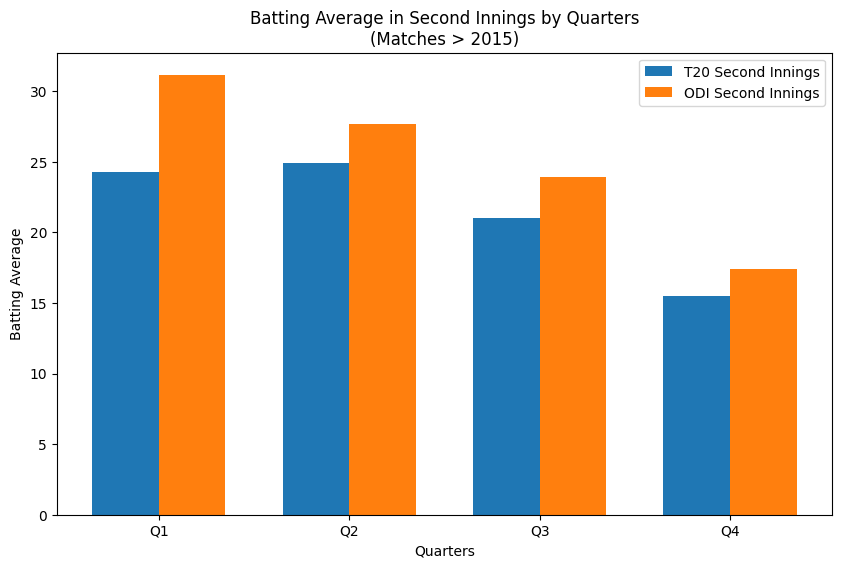

In [50]:

quarters = ['Q1', 'Q2', 'Q3', 'Q4']

t20_first_inn_avg = [float(t20_bat_avg['f_avg_q_1_t20']), float(t20_bat_avg['f_avg_q_2_t20']), float(t20_bat_avg['f_avg_q_3_t20']), float(t20_bat_avg['f_avg_q_4_t20'])]
odi_first_inn_avg = [float(odi_bat_avg['f_avg_q_1_odi']), float(odi_bat_avg['f_avg_q_2_odi']), float(odi_bat_avg['f_avg_q_3_odi']), float(odi_bat_avg['f_avg_q_4_odi'])]

t20_second_inn_avg = [float(t20_bat_avg['s_avg_q_1_t20']), float(t20_bat_avg['s_avg_q_2_t20']), float(t20_bat_avg['s_avg_q_3_t20']), float(t20_bat_avg['s_avg_q_4_t20'])]
odi_second_inn_avg = [float(odi_bat_avg['s_avg_q_1_odi']), float(odi_bat_avg['s_avg_q_2_odi']), float(odi_bat_avg['s_avg_q_3_odi']), float(odi_bat_avg['s_avg_q_4_odi'])]

plt.figure(figsize=(10, 6))
width = 0.35
x = range(len(quarters))
plt.bar(x, t20_first_inn_avg, width, label='T20 First Innings')
plt.bar([p + width for p in x], odi_first_inn_avg, width, label='ODI First Innings')
plt.xlabel('Quarters')
plt.ylabel('Batting Average')
plt.title('Batting Average in First Innings by Quarters\n(Matches > 2015)')
plt.xticks([p + width/2 for p in x], quarters)
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(x, t20_second_inn_avg, width, label='T20 Second Innings')
plt.bar([p + width for p in x], odi_second_inn_avg, width, label='ODI Second Innings')
plt.xlabel('Quarters')
plt.ylabel('Batting Average')
plt.title('Batting Average in Second Innings by Quarters\n(Matches > 2015)')
plt.xticks([p + width/2 for p in x], quarters)
plt.legend()
plt.show()

/tmp/ipykernel_41890/548384555.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  t20_first_inn_sr = [float(t20_bat_sr['f_sr_q_1_t20']), float(t20_bat_sr['f_sr_q_2_t20']), float(t20_bat_sr['f_sr_q_3_t20']), float(t20_bat_sr['f_sr_q_4_t20'])]
/tmp/ipykernel_41890/548384555.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  odi_first_inn_sr = [float(odi_bat_sr['f_sr_q_1_odi']), float(odi_bat_sr['f_sr_q_2_odi']), float(odi_bat_sr['f_sr_q_3_odi']), float(odi_bat_sr['f_sr_q_4_odi'])]
/tmp/ipykernel_41890/548384555.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you ex

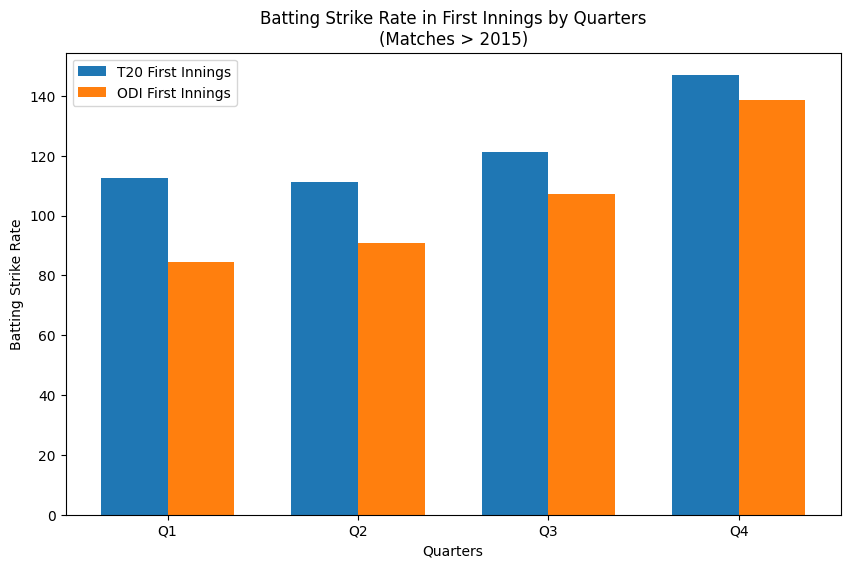

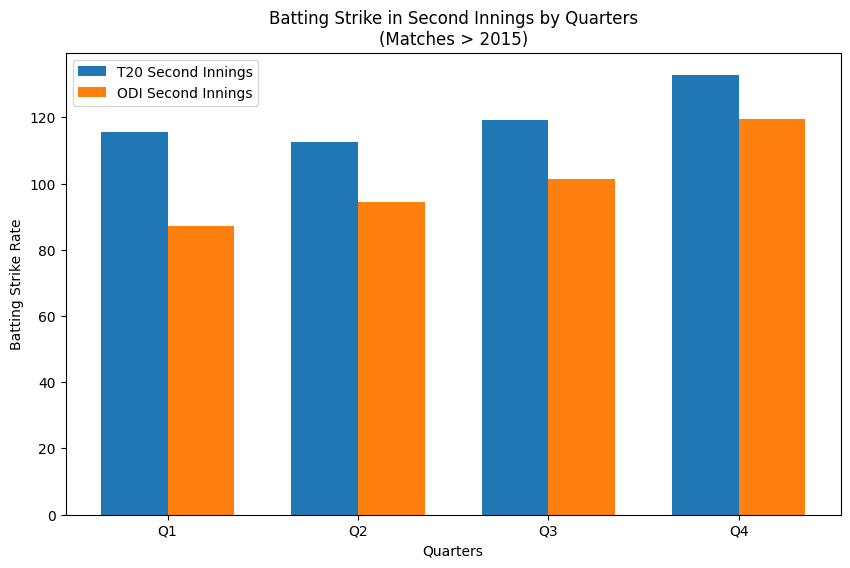

In [51]:

quarters = ['Q1', 'Q2', 'Q3', 'Q4']

t20_first_inn_sr = [float(t20_bat_sr['f_sr_q_1_t20']), float(t20_bat_sr['f_sr_q_2_t20']), float(t20_bat_sr['f_sr_q_3_t20']), float(t20_bat_sr['f_sr_q_4_t20'])]
odi_first_inn_sr = [float(odi_bat_sr['f_sr_q_1_odi']), float(odi_bat_sr['f_sr_q_2_odi']), float(odi_bat_sr['f_sr_q_3_odi']), float(odi_bat_sr['f_sr_q_4_odi'])]

t20_second_inn_sr = [float(t20_bat_sr['s_sr_q_1_t20']), float(t20_bat_sr['s_sr_q_2_t20']), float(t20_bat_sr['s_sr_q_3_t20']), float(t20_bat_sr['s_sr_q_4_t20'])]
odi_second_inn_sr = [float(odi_bat_sr['s_sr_q_1_odi']), float(odi_bat_sr['s_sr_q_2_odi']), float(odi_bat_sr['s_sr_q_3_odi']), float(odi_bat_sr['s_sr_q_4_odi'])]

plt.figure(figsize=(10, 6))
width = 0.35
x = range(len(quarters))
plt.bar(x, t20_first_inn_sr, width, label='T20 First Innings')
plt.bar([p + width for p in x], odi_first_inn_sr, width, label='ODI First Innings')
plt.xlabel('Quarters')
plt.ylabel('Batting Strike Rate')
plt.title('Batting Strike Rate in First Innings by Quarters\n(Matches > 2015)')
plt.xticks([p + width/2 for p in x], quarters)
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(x, t20_second_inn_sr, width, label='T20 Second Innings')
plt.bar([p + width for p in x], odi_second_inn_sr, width, label='ODI Second Innings')
plt.xlabel('Quarters')
plt.ylabel('Batting Strike Rate')
plt.title('Batting Strike in Second Innings by Quarters\n(Matches > 2015)')
plt.xticks([p + width/2 for p in x], quarters)
plt.legend()
plt.show()